In [2]:
import jax
import jax.numpy as jnp

In [7]:
jax.devices()

[CpuDevice(id=0)]

In [5]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

cpu


In [3]:
x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
long_vector = jnp.arange(int(1e7))

%timeit jnp.dot(long_vector, long_vector).block_until_ready()

4.02 ms ± 36.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# linreg with jax

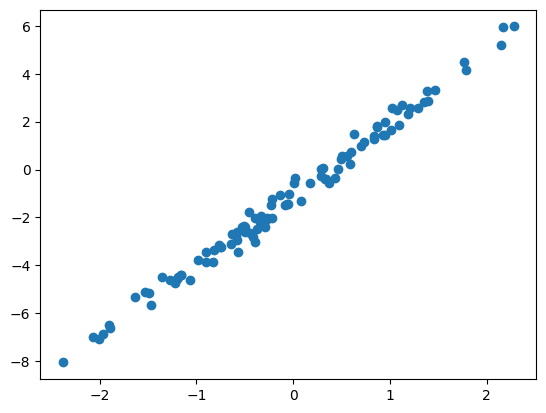

In [18]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.3, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [19]:
def model(theta, x):
    """Computes wx + b on a batch of input x."""
    w, b = theta
    return w * x + b

In [20]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)

In [21]:
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 2.95, b: -1.04


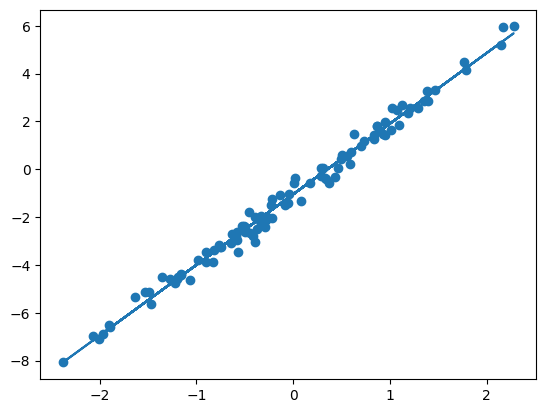

In [22]:
theta = jnp.array([1., 1.])

for _ in range(1000):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

In [29]:
NB_DAYS_PER_YEAR = 252

In [30]:
import numpy as np
import pandas as pd

In [31]:
T = [1/NB_DAYS_PER_YEAR, 1/52, 2/42, 1/12, 2/12, 3/12, 6/12, 9/12, 1.]

In [47]:
K = [4000, 4500, 4800, 4900, 5000, 5100, 5200, 5500]

In [48]:
ivs = [[.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26],
       [.50, .35, .28, .23, .20, .18, .21, .26]]

In [50]:
ivs

[[0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26],
 [0.5, 0.35, 0.28, 0.23, 0.2, 0.18, 0.21, 0.26]]

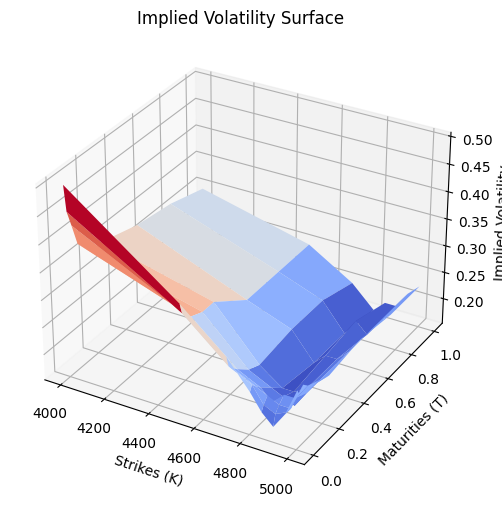

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Provided data
T = [0.003968253968253968, 0.019230769230769232, 0.047619047619047616, 0.08333333333333333, 0.16666666666666666, 0.25, 0.5, 0.75, 1.0]
K = [4000, 4500, 4700, 4800, 4850, 4900, 4950, 5000]
ivs = [[.50, .35, .28, .23, .20, .18, .21, .26],
       [.45, .33, .26, .24, .21, .20, .21, .25],
       [.42, .32, .25, .23, .22, .21, .21, .26],
       [.38, .31, .24, .22, .20, .22, .22, .25],
       [.35, .30, .22, .20, .19, .18, .21, .24],
       [.35, .30, .21, .18, .18, .19, .21, .23],
       [.33, .25, .22, .17, .19, .19, .21, .24],
       [.32, .25, .22, .17, .20, .18, .21, .23],
       [.30, .25, .20, .16, .18, .18, .21, .23]]

# Convert data to numpy arrays
T = np.array(T)
K = np.array(K)
ivs = np.array(ivs)

# Create meshgrid for maturities and strikes
X, Y = np.meshgrid(K, T)

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot implied volatility surface
ax.plot_surface(X, Y, ivs, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Strikes (K)')
ax.set_ylabel('Maturities (T)')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface')

# Show plot
plt.show()
